<a href="https://colab.research.google.com/github/dewi31/malaria_classification/blob/main/VGG_19_%2B_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
import keras
from keras.models import Sequential,  Model, load_model

In [ ]:
print(os.listdir("/content/drive/MyDrive/Fold_1"))

['train', 'validation']


In [ ]:

SIZE = 100
train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Fold_1/train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Normal
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (55).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (35).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (48).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (49).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (50).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (51).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (52).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (53).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (54).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (12).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (13).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (14).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (15).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (16).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (17).png
/content/drive/MyDrive/Fold_1/train/Normal/Normal_ (18).png
/content/drive/MyDrive/Fold_1/tra

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/Fold_1/validation/*"):
    fruit_label = directory_path.split("/")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Parasit
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (1).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (6).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (7).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (8).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (9).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (11).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (10).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (3).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (4).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (5).png
/content/drive/MyDrive/Fold_1/validation/Parasit/Parasit_ (2).png
Normal
/content/drive/MyDrive/Fold_1/validation/Normal/Normal_ (1).png
/content/drive/MyDrive/Fold_1/validation/Normal/Normal_ (3).png
/content/drive/MyDrive/Fold_1/validation/Normal/Normal_ (4).png
/content/drive/MyDrive/Fold_1/validation/Normal/Normal_ (5).png
/

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
VGG = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
for layer in VGG.layers:
	layer.trainable = False

last_output= VGG.layers[-1].output

last_output= keras.layers.Flatten()(last_output)

VGG_model= Model(VGG.input, last_output)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
feature_extractor=VGG_model.predict(x_train)

3/3 [==============================] - 13s 3s/step


In [ ]:
X_for_RF = feature_extractor

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

1/1 [==============================] - 3s 3s/step


In [ ]:
prediction_RF = RF_model.predict(X_test_features)
# prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels_encoded, prediction_RF))

Accuracy =  0.9545454545454546


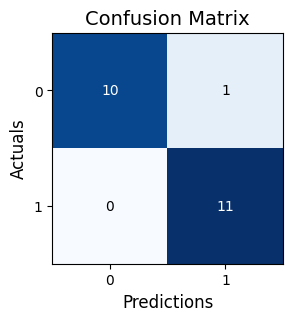

Akurasi = "95.45%"
Sensitivitas = "100.0%"
Spesifitas = "90.91%"


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(test_labels_encoded, prediction_RF)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(3, 3), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print('Akurasi = "{}%"'.format(round((TP + TN) /
(TP + TN + FN + FP)*100,2)))
print('Sensitivitas = "{}%"'.format(round((TP) /
(TP + FN)*100,2)))
print('Spesifitas = "{}%"'.format(round((TN) /
(TN + FP)*100,2)))

1/1 [==============================] - 0s 199ms/step
Prediksi dari gambar ini adalah:  ['Normal']
Label sebenarnya dari gambar ini adalah:  Normal


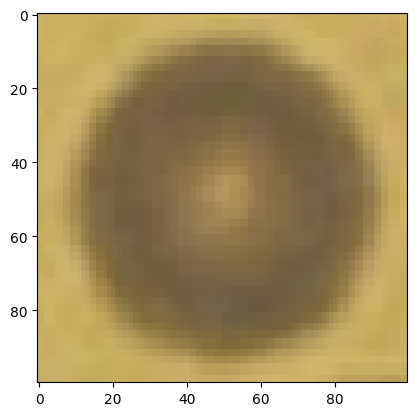

In [ ]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("Prediksi dari gambar ini adalah: ", prediction_RF)
print("Label sebenarnya dari gambar ini adalah: ", test_labels[n])